(1, 1, -1) -1
(3, 3, 1) 1
(4, 3, 1) 1
Iter: 0
	w= [0, -5] || b= 9 ||ErrorPoint= (1, 1, -1) 
	0*x1 + -5*x2 + 9 = 0
	w= [3, -2] || b= 10 ||ErrorPoint= (3, 3, 1) 
	3*x1 + -2*x2 + 10 = 0
Iter: 1
	w= [2, -3] || b= 9 ||ErrorPoint= (1, 1, -1) 
	2*x1 + -3*x2 + 9 = 0
Iter: 2
	w= [1, -4] || b= 8 ||ErrorPoint= (1, 1, -1) 
	1*x1 + -4*x2 + 8 = 0
	w= [4, -1] || b= 9 ||ErrorPoint= (3, 3, 1) 
	4*x1 + -1*x2 + 9 = 0
Iter: 3
	w= [3, -2] || b= 8 ||ErrorPoint= (1, 1, -1) 
	3*x1 + -2*x2 + 8 = 0
Iter: 4
	w= [2, -3] || b= 7 ||ErrorPoint= (1, 1, -1) 
	2*x1 + -3*x2 + 7 = 0
Iter: 5
	w= [1, -4] || b= 6 ||ErrorPoint= (1, 1, -1) 
	1*x1 + -4*x2 + 6 = 0
	w= [4, -1] || b= 7 ||ErrorPoint= (3, 3, 1) 
	4*x1 + -1*x2 + 7 = 0
Iter: 6
	w= [3, -2] || b= 6 ||ErrorPoint= (1, 1, -1) 
	3*x1 + -2*x2 + 6 = 0
Iter: 7
	w= [2, -3] || b= 5 ||ErrorPoint= (1, 1, -1) 
	2*x1 + -3*x2 + 5 = 0
Iter: 8
	w= [1, -4] || b= 4 ||ErrorPoint= (1, 1, -1) 
	1*x1 + -4*x2 + 4 = 0
	w= [4, -1] || b= 5 ||ErrorPoint= (3, 3, 1) 
	4*x1 + -1*x2 + 5 = 0
Iter: 9


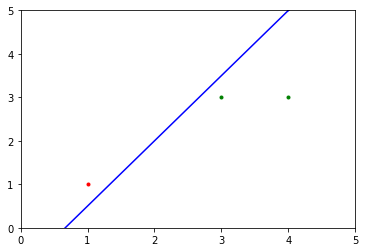

In [2]:
import sys
import matplotlib.pyplot as plt  

data=(
(1,1,-1),
(3,3,1),
(4,3,1),
)
for r in data:
    print(r,r[-1])
datarange=5

#造更多数据看效果
# w_init=[1,-3]; b_init=10
# datarange=5
# import random
# random.random()
# data=[]
# for i in xrange(100):
    # x1=random.random()*datarange
    # x2=random.random()*datarange
    # y=1 if x1*w_init[0]+x2*w_init[1]+b_init>0 else -1
    # tmp=[x1,x2,y]
    # data.append(tmp)
# for r in data:
    # print r[0],"\t",r[1],"\t",r[2]
    



w=[1, -4]
b=10
learnRate=1
MaxTry=5000
ErrPoint=True
for i in range(MaxTry):
    print("Iter:",i)
    ErrPoint=False
    for d in data:
        fxi=d[0]*w[0]+d[1]*w[1]+b
        yi=d[2]
        if fxi*yi<=0: # 实际的正负号 与 预测的正负号 不一致=>有个点被误分类了。向梯度方向调整一下
            ErrPoint=True
            w[0]=w[0]+learnRate*yi*d[0]  # 对wi求偏导时，其他wj和b是常数项被消掉
            w[1]=w[1]+learnRate*yi*d[1]
            b=b+learnRate*yi # 对b求偏导时，wi是常数项被消掉
            print("\tw=",w,"|| b=",b,"||ErrorPoint=",d,"\n\t%s*x1 + %s*x2 + %s = 0"%(w[0],w[1],b))
            # break #每次找一个点调参数=随机梯度下降。 不break则是所有点一起调参=批量梯度下降。另外：每次找n个点调参=小批量梯度下降
    if not ErrPoint:break

print(w, b)
print("\t%s*x1 + %s*x2 + %s = 0"%(w[0],w[1],b))

    
plt.xlim(0,datarange)
plt.ylim(0,datarange)
plt.plot([x[0] for x in data if x[2]>0],[x[1] for x in data if x[2]>0],'.g')
plt.plot([x[0] for x in data if x[2]<=0],[x[1] for x in data if x[2]<=0],'.r')
plt.plot([0,-b*1.0/w[0],datarange,-1.0*(b+datarange*w[1])/w[0]],[-b*1.0/w[1],0,-1.0*(b+datarange*w[0])/w[1],datarange],'b')
plt.show()
